In [27]:
import pandas as pd
import numpy as np
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.cross_validation import train_test_split
from sklearn import tree

data_filename = 'covtype.csv'
df = pd.read_csv(data_filename)

#In order to avoid cheating, we split the data into training and testing datasets.
train,test = train_test_split(df,test_size=0.2,random_state=999)

#create the variable that we will use to train and evaluate our models.
train_x = train.loc[:, train.columns != 'Cover_Type']
train_y = train['Cover_Type']

test_x = test.loc[:, test.columns != 'Cover_Type']
test_y = test['Cover_Type']

In [2]:
#we check for missing values. Fortunetely, we do not have any NaNs.
df_nas = df.isnull().sum()
df_nas = df_nas[df_nas>0]
df_nas.sort_values(ascending=False)

Series([], dtype: int64)

In [28]:
#We create a dataframe that we will store the results of each model
Model_Results = pd.DataFrame()
Model_Results['Evaluators'] = ['Accuracy Score','Report']

We will evaluate our models via accuracy score.
Accuracy score is the the percentage of correctly_predicted_classes.
Accuracy has been discused a lot in the Assignment 3, Question 3.

Furthermore, classification_report is a very nice function to interpret the results of a classification model.

Returns:

Precision: Out of the predictions of EACH class we identify how many are correctly predicted. Total_Trees_Predicted_Xi/ Total_Correctly_predicted_Xi

Recall : Percentage of the trees identified correctly for each class. Total_Correctly_Predicted_Xi / Total_Class_Xi

F1-score is a measure of a test's accuracy. It considers both the precision p and the recall r of the test to compute the score: p is the number of correct positive results divided by the number of all positive results

More discussion about those measurements have been done on Assignment_3/Question_3

1rst mode: DesicionTreeClassifier

Simple Explanation:
Very similar technique with DesicionTreeRegression (explained on Question1/Assignment4).
However, this time you use as split-point critirion Gini impurity or entropy, measuring the information gain.

In [25]:
#FIRST MODEL DESICIONTREECLASSIFIER
#~2min
parameters = [
    {'max_depth': list(range(5, 15,2))},
    {'min_samples_split': [2,3] }
]

cv = KFold(n_splits=11, shuffle=True, random_state=13)

clf = GridSearchCV(DecisionTreeClassifier(criterion='gini'), parameters, cv = cv, n_jobs = -1)

clf = clf.fit(train_x, train_y)

print(clf.best_estimator_)

NameError: name 'train_x' is not defined

In [5]:
#copy-paste the parameteres from previous cell's output
clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
#train
clf = clf.fit(train_x, train_y)
#predict test_y
predict = clf.predict(test_x)

target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6' ]
score = format(accuracy_score(test_y,predict), '.3f')

Model_Results['DecisionTreeClassifier'] = score

print('Model: DecisionTreeClassifier')
print('Accuracy score: ', score)
print('More Details:')
print(classification_report(test_y, predict, target_names=target_names))

Model: DecisionTreeClassifier
Accuracy score:  0.940
More Details:
             precision    recall  f1-score   support

    class 0       0.94      0.94      0.94     42479
    class 1       0.95      0.95      0.95     56554
    class 2       0.93      0.93      0.93      7148
    class 3       0.84      0.83      0.83       559
    class 4       0.84      0.85      0.84      1938
    class 5       0.87      0.88      0.87      3392
    class 6       0.95      0.94      0.95      4133

avg / total       0.94      0.94      0.94    116203



2nd model: RandomForestClassifier

The mechanism of this model has been explained on Question_1/Assignment_4.
The only difference between RandomForestRegressor and Classifier is that in this case the model uses the most frequent class, instead of the average predicted value of the n_estimators(trees).

In [4]:
#SECOND MODEL: RANDOMFORESTCLASSIFIER
#Because of the big size of the dataframe we tried to GridSearch with a partition of the data and then use the best parameteres to train our RF.
#However, the results were much better when we ran a RandomForest with the default parameters and use all the data.

#SKIP THIS CELL
'''
sample_indices = np.random.choice(df.index, 100000, replace = False)
df_sample = df.iloc[sample_indices, :]

train_sample, test_sample = train_test_split(df_sample,test_size=0.5,random_state=999)
#create the variable that we will use to train and evaluate our models.
trainS_x = train_sample.loc[:, train_sample.columns != 'Cover_Type']
trainS_y = train_sample['Cover_Type']

testS_x = test_sample.loc[:, test_sample.columns != 'Cover_Type']
testS_y = test_sample['Cover_Type']

tuned_parameters = {'n_estimators': [50, 100, 500, 700], 
                    'max_depth': list(range(5,17,2)),                    
                    }

#try all the compinations of the parameters above with GridSearchCV function
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5, 
           n_jobs=-1, verbose=1)

clf.fit(trainS_x, trainS_y)
#print the best parameters of the model (our models are evaluated by mean squared error)
print(clf.best_estimator_)'''

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  7.2min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=700, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [29]:
RF = RandomForestClassifier(random_state= 2, n_jobs=-1)

RF = RF.fit(train_x, train_y)
predict_RF = RF.predict(test_x)

target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6' ]
score = format(accuracy_score(test_y,predict_RF), '.3f')

Model_Results['RandomForestClassifier'] = score

print('Model: RandomForestClassifier')
print('Accuracy score: ', score)
print('More Details:')
print(classification_report(test_y, predict_RF, target_names=target_names))

Model: RandomForestClassifier
Accuracy score:  0.944
More Details:
             precision    recall  f1-score   support

    class 0       0.94      0.95      0.94     42479
    class 1       0.95      0.96      0.95     56554
    class 2       0.92      0.95      0.94      7148
    class 3       0.91      0.84      0.87       559
    class 4       0.92      0.73      0.81      1938
    class 5       0.92      0.84      0.88      3392
    class 6       0.97      0.92      0.95      4133

avg / total       0.94      0.94      0.94    116203



Model 3: Support Vector Machines.

With this model we achieve greater robustness to invividual observations and better classification of most of the observations.
The multiclass support is handled according to a one-vs-one scheme.

We select the hyperplane with the maximal margin.
Support Vector Machines is a very good algorithm to classify data but it has high computational cost.
For the reason described above we have to randomly select only a small prartition of our data to train our model(5k train/test datapoints).

The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to dataset with more than a couple of 10000 samples.

However, it will take about 5mins to train our model without even do some tuning to the parameteres.

Simple Explanation of SVMs
We want to separate our observations into two classes.
We try to find the best hyperplane.
We compute the perpendicular distance from each observation to the candidate hyperplane. The smallest of these distances is called the margin.We select the hyperplane with the maximal margin.
To avoid overfit, instead of trying to find the biggest margin, SVM allows some observations to lie on the wrong side of the margin.
If we have more than two classes, we can work with the strategy One-versus-One Classification.

In [10]:
#THIRD MODEL: SUPPORT VECTOR MACHINES
#we create new training and testing dataframes with randomly selected rows 
sample_indices = np.random.choice(df.index, 20000, replace = False)
df_sample = df.iloc[sample_indices, :]

train_sample, test_sample = train_test_split(df_sample,test_size=0.5,random_state=999)
#create the variables that we will use to train and evaluate our models.
trainS_x = train_sample.loc[:, train_sample.columns != 'Cover_Type']
trainS_y = train_sample['Cover_Type']

testS_x = test_sample.loc[:, test_sample.columns != 'Cover_Type']
testS_y = test_sample['Cover_Type']

In [11]:
#~3min
svm_model = SVC(gamma=0.001, C=100., random_state = 0)
svm_model = svm_model.fit(trainS_x, trainS_y)
predict = svm_model.predict(testS_x)

target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6' ]
score = format(accuracy_score(testS_y,predict), '.3f')

Model_Results['SupportVectorMachines'] = score

print('Model: SupportVectorMachines')
print('Accuracy score: ', score)
print('More Details:')
print(classification_report(testS_y, predict, target_names=target_names))

Model: SupportVectorMachines
Accuracy score:  0.520
More Details:
             precision    recall  f1-score   support

    class 0       0.96      0.05      0.10      3586
    class 1       0.51      1.00      0.68      5012
    class 2       1.00      0.00      0.01       593
    class 3       0.00      0.00      0.00        43
    class 4       1.00      0.01      0.01       168
    class 5       1.00      0.01      0.01       277
    class 6       1.00      0.01      0.01       321

avg / total       0.74      0.52      0.38     10000



C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Results:
In our case we have really bad accuracy_score with the SVC model.
This happens for two reasons.
1. We use only a small proportion of our data to train our model and we lose a lot of usefull information.
2. This model is really slow to train so we cannot apply tuning techniques to find the best parameters
All in all, SVM is not a good practice when you have a big dataset.


Now we can compare the accuracy_scores of each model.

In [30]:
Model_Results

,Evaluators,RandomForestClassifier
0,Accuracy Score,0.944
1,Report,0.944


As we can see from the output from the cell above, RandoForestClassifier has the best score.
We also showed more details about each class' accuracy.(precision,recall,f1-score etc)

RandomForest Details:
             precision    recall  f1-score   support

    class 0       0.94      0.95      0.94     42479
    class 1       0.95      0.96      0.95     56554
    class 2       0.92      0.95      0.94      7148
    class 3       0.91      0.84      0.87       559
    class 4       0.92      0.73      0.81      1938
    class 5       0.92      0.84      0.88      3392
    class 6       0.97      0.92      0.95      4133

avg / total       0.94      0.94      0.94    116203

From the table above we can see that the most difficult to predict was class 4 (or Tree number 5 : 'Aspen').

To find which pair of cover types was hardest to distinguish we calculated for every pair of classes the misspredicted rows as the other type divided by the total misspredicted rows of these types.

We need a percentage and not just a count because the dataframe is imbalanced.

More specifically:

count(type1_wrongly_predicted_as_type2) + count(type2_wrongly_predicted_as_type1) / total_number_of_misspredicted_type1_and_type2

In [13]:
#create a dataframe with the predicted and actual classes of the RandomForestClassifier(our best model)
df_forest=pd.DataFrame({'actual': test_y,
                 'predict': predict_RF}) 

#create a dict to store all the results between pairs
pairs_missdistinguished_percent = dict()

def percentage_of_missdistinguished_pair(df, type1, type2):
    #count the number of class2 predicted as class1
    t1_as_t2 = len(df.loc[(df['predict'] == type1) & (df['actual'] == type2), :]) 
    #count the number of class1 predicted as class2
    t2_as_t1 = len(df.loc[(df['predict'] == type2) & (df['actual'] == type1), :])
    #total number of both types
    total_misspred_t1 = len(df.loc[(df['actual'] == type1) & (df['predict'] != type1)]) 
    total_misspred_t2 = len(df.loc[(df['actual'] == type2) & (df['predict'] != type2)]) 
    #calculate the percentage of missdistinguished types between this spesific pair.
    percentage_of_failure = (t1_as_t2 + t2_as_t1)/(total_misspred_t1 + total_misspred_t2)
    return percentage_of_failure
    
#ALL THE PAIRS
pairs = [(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(2,3),(2,4),(2,5),(2,6),(2,7),(3,4),(3,5),(3,6),(3,7),(4,5),(4,6),(4,7),(5,6),(5,7),(6,7)]
#run the function for every pair
for pair in pairs:
    #store the results into the dictionary that we created above
    type_pair = str(pair[0]) + '-'+ str(pair[1])
    pairs_missdistinguished_percent[type_pair] = percentage_of_missdistinguished_pair(df_forest,pair[0],pair[1])

print('The hardest to distinguish pair with RandomForestClassifier is: ' + max(pairs_missdistinguished_percent,key=pairs_missdistinguished_percent.get) + ' (Spruce/Fir and Lodgepole Pine)')

The hardest to distinguish pair with RandomForestClassifier is: 1-2 (Spruce/Fir and Lodgepole Pine)


In [31]:
#Here we will order the features according to their importance for the RandomForest model.
X = train_x
Y = train_y

importances = RF.feature_importances_

std = np.std([tree.feature_importances_ for tree in RF.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]

for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], train_x.columns[indices[f]], importances[indices[f]]))

1. feature 0 Elevation (0.229259)
2. feature 5 Horizontal_Distance_To_Roadways (0.115043)
3. feature 9 Horizontal_Distance_To_Fire_Points (0.114200)
4. feature 3 Horizontal_Distance_To_Hydrology (0.061379)
5. feature 4 Vertical_Distance_To_Hydrology (0.057739)
6. feature 1 Aspect (0.047952)
7. feature 8 Hillshade_3pm (0.040994)
8. feature 7 Hillshade_Noon (0.040496)
9. feature 6 Hillshade_9am (0.039773)
10. feature 13 Wilderness_Area4 (0.038369)
11. feature 2 Slope (0.033225)
12. feature 35 Soil_Type22 (0.016159)
13. feature 17 Soil_Type4 (0.014934)
14. feature 25 Soil_Type12 (0.012245)
15. feature 36 Soil_Type23 (0.012050)
16. feature 23 Soil_Type10 (0.011607)
17. feature 52 Soil_Type39 (0.011203)
18. feature 15 Soil_Type2 (0.010222)
19. feature 51 Soil_Type38 (0.009885)
20. feature 12 Wilderness_Area3 (0.009085)
21. feature 10 Wilderness_Area1 (0.008938)
22. feature 11 Wilderness_Area2 (0.007310)
23. feature 53 Soil_Type40 (0.006869)
24. feature 45 Soil_Type32 (0.004983)
25. feature 

(-1, 54)

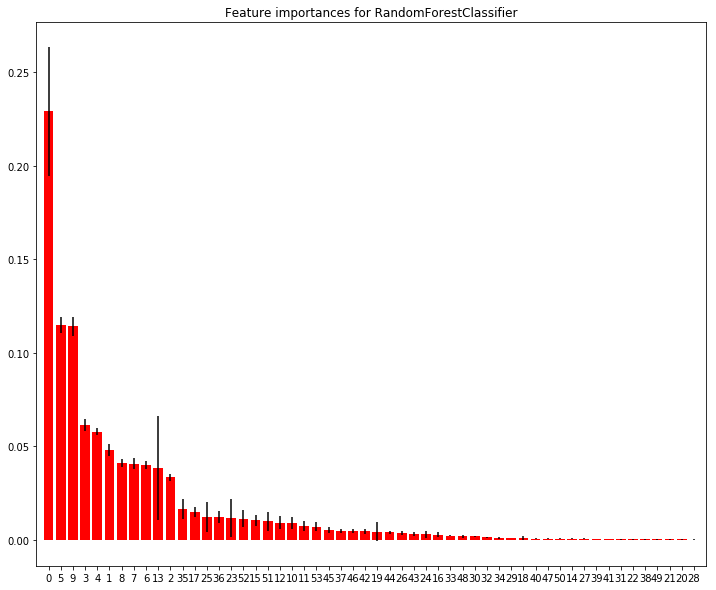

In [15]:
# Plot the feature importances of the forest
plt.figure(figsize=(12, 10))
plt.title("Feature importances for RandomForestClassifier")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])

Features selection:

The model with the best score(RandomForestClassifier) is using all the variables to predict the cover type.
This is quite normal because even if we have a max depth on this model, RandomForest is selecting for each estimator(DecTree) a number m of random predictors(features) as have been explained(Question1/Assign4).

We can prove that on the next cell:

In [16]:
#model.feature_importances_ get the importance for every feature that have been used even if that value is too small.
print('RandomForestClassifier uses all the features: ',len(train_x.columns) == len(RF.feature_importances_))

RandomForestClassifier uses all the features:  True
